In [1]:
# all packages
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# A function for data cleaning

def wrangle(filename):
    
    # reading the csv files
    df = pd.read_csv(filename)
    
    # Convert 'Quantity Ordered' to numeric, coercing errors to NaN
    df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')

    # Convert 'Price Each' to numeric, coercing errors to NaN
    df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
    
    # Dropping all missing values 
    df = df.dropna()
    
    # Total gain from one sale 
    df["total"] = df['Quantity Ordered'] * df['Price Each'] 
    
    #revenue 
    revenue = (df["total"].sum()).round(2)
    
    # cities of sales
    df["city"] = df["Purchase Address"].str.split(",", expand=True)[1]
    
    # Time column
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    df['Hour'] = df['Order Date'].dt.hour
    
    return df ,revenue
    

In [3]:
# A Functiuon to combined all the data frames
def combined_data(path):
    files = glob.glob(path + '*2019.csv')
    # Iterate over the selected files and load them into a single DataFrame
    dfs = []
    revenue= []
    month=[]
    for file in files:
        df,rev = wrangle(file)
        dfs.append(df)
        revenue.append(rev)
        # Extract the month name
        month_name = file.split("_")[-2]
        month.append(month_name)

    df = pd.concat(dfs, ignore_index=True)
    
    return df, revenue , month
    

In [4]:
# initialisemthe data frame
df,revenue,month=combined_data('Sales_Data/')

In [5]:
# run this code to verify if you ae doing the correct thing
assert df.shape ==(185950, 9), "The number of columns and rows  in the DataFrame is not equal to (185950, 9)"

## Question 1: 
### What is the best sales month? and What is the revenue for that month?

As you can see on the graph below the month with the best sale is december with a revenue of 4619297.12 

Text(0.5, 1.0, 'Revenue per month in year 2019')

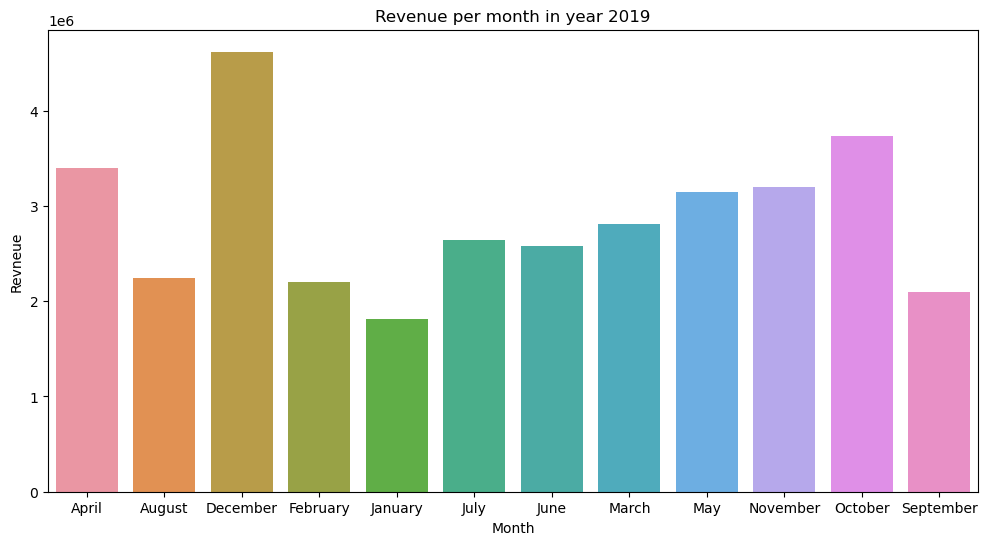

In [6]:
# We will do a visualization to show the revenue per each month
plt.figure(figsize=(12, 6)) 
# Plot the  bar chart
sns.barplot(x=month, y=revenue)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Revneue')
plt.title('Revenue per month in year 2019')


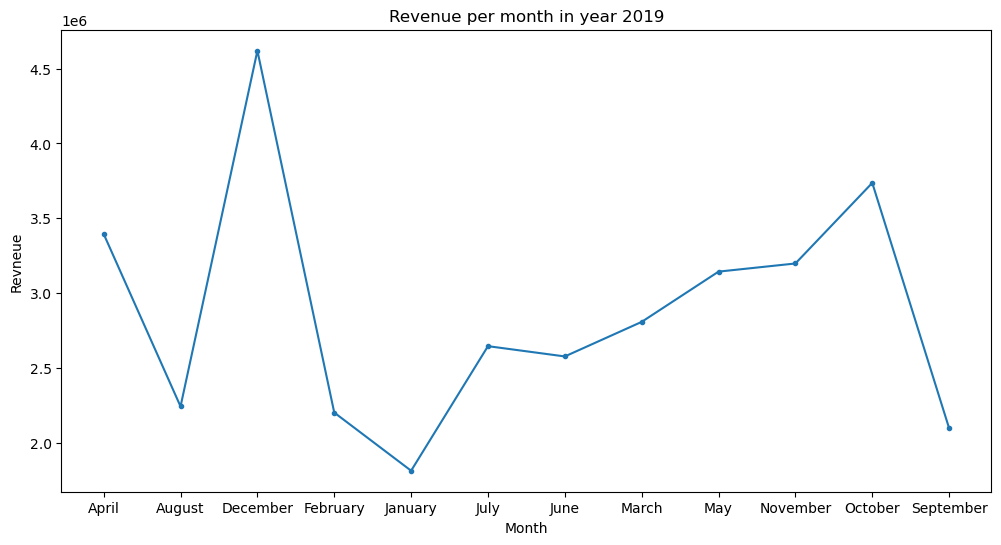

In [7]:
plt.figure(figsize=(12, 6)) 
# Plot the line plot
plt.plot(month, revenue, marker=".")
plt.xlabel('Month')
plt.ylabel('Revneue')
plt.title('Revenue per month in year 2019')
plt.show()

## Question 2:
### In which city did we sell the most products?

From the visualization below the city where we sell the most product is San francisco

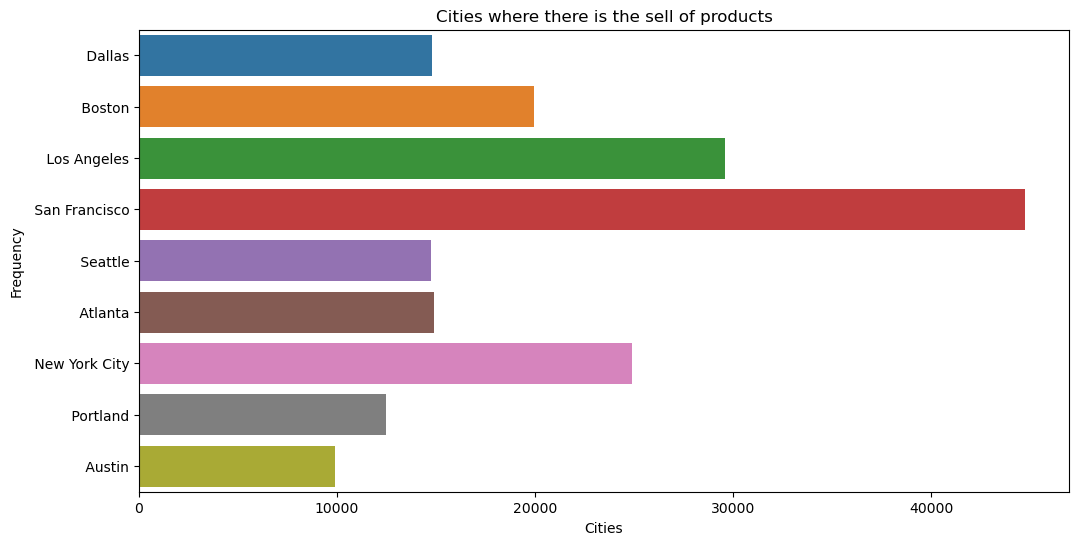

In [8]:
# countplot to show the city with most sell products
plt.figure(figsize=(12, 6))
sns.countplot(y=df["city"])
# Add labels and title
plt.xlabel('Cities')
plt.ylabel('Frequency')
plt.title('Cities where there is the sell of products')
plt.show()

## Question 3: 
### At what time should we advertise to increase our sales?
The best time is 11 to 13 and from 18 to 20

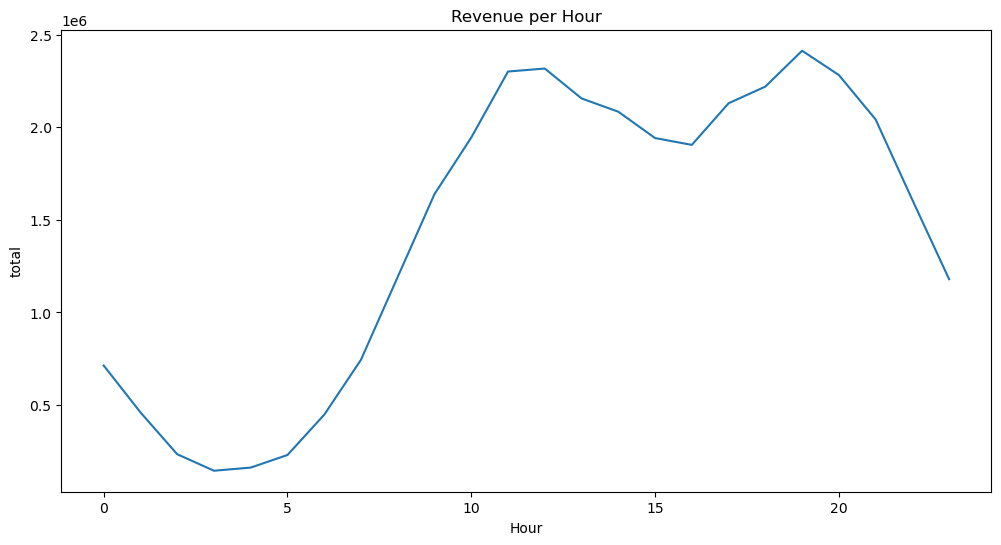

In [9]:
time_df= df.groupby('Hour')['total'].sum().reset_index()
time_df= time_df.sort_values('Hour', ascending=False)
    
# We will do a visualization to show the revenue per each month
plt.figure(figsize=(12, 6)) 
# Plot the  bar chart
plt.plot(time_df['Hour'],time_df['total'])
# Add labels and title
plt.xlabel('Hour')
plt.ylabel('total')
plt.title('Revenue per Hour')
plt.show()

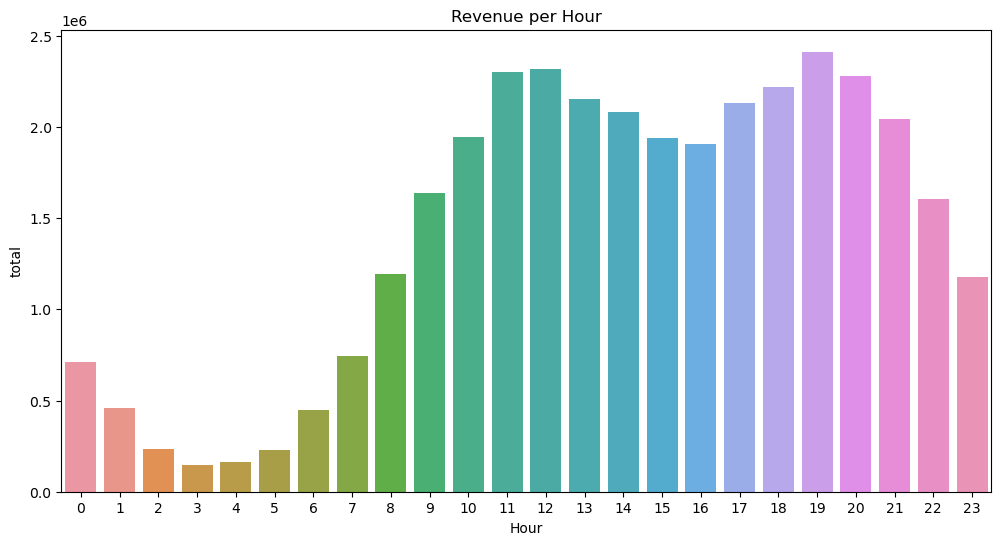

In [10]:
# We will do a visualization to show the revenue per each month
plt.figure(figsize=(12, 6)) 
# Plot the  bar chart
sns.barplot(x=time_df['Hour'],y=time_df['total'])
# Add labels and title
plt.xlabel('Hour')
plt.ylabel('total')
plt.title('Revenue per Hour')
plt.show()

## Question 4:
### Which product sold the most and why?

From the visualization below the product most sold is AAA batteries (4-pack) because of the quantity bought per orderid

Text(0.5, 1.0, 'Product Bought')

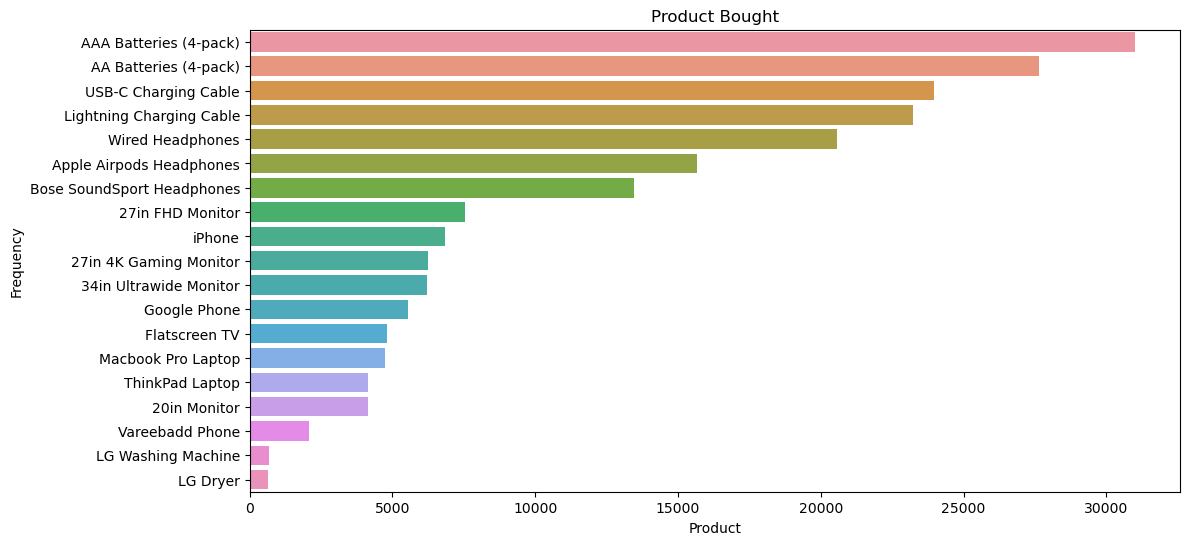

In [11]:
new_df = df.groupby('Product')['Quantity Ordered'].sum().reset_index()
new_df = new_df.sort_values('Quantity Ordered', ascending=False)
# We will do a visualization to show the revenue per each month
plt.figure(figsize=(12, 6)) 
# Plot the  bar chart
sns.barplot(x=new_df['Quantity Ordered'], y=new_df['Product'])
# Add labels and title
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Product Bought')
# plt.show()

In [12]:
# save the dataframe
df.to_csv('final_Data/Output.csv', index=False)